In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import KMeansSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
pd.set_option('display.max_columns', None)
state = 0 # for random state

In [2]:
filenames = [i for i in glob.glob('lengthofstay/*.csv')]

df = pd.read_csv(filenames[0], index_col=[0], sep='\t')
for i in range(1, len(filenames)):
    print(filenames[i][13:])
    single = pd.read_csv(filenames[i], index_col=[0], sep='\t')
    df = df.merge(single, left_on='hadm_id', right_on='hadm_id')

ICU_LOS.csv
TOTAL_LOS.csv
TEMP.csv
CREATININE.csv
WHITE_BLOOD_CELLS.csv
BLOOD_GLUCOSE.csv
BICARBONATE.csv
PROCEDURE_COUTNS.csv
RESP_RATE.csv
HR.csv
SURGERY_FLAGS.csv
DEMO_DATA.csv
PLATELET_COUNT.csv
HEMATOCRIT.csv
SERVICES.csv
ALBUMIN.csv
CVP.csv
SEVERITY_SCORES.csv
ICD9_DIAG.csv
SODIUM.csv
MECH_VENT_TIME.csv
SPO2.csv
POTASSIUM.csv
PREVIOUS_ADMISSION_COUNT.csv
BLOOD_UREA_NITROGEN.csv
ART_PH.csv
DIAS_PRESS.csv


In [3]:
df.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [4]:
df = df.round(3)

In [5]:
df1 = df.copy()

In [6]:
df.drop(columns=['subject_id','hadm_id'], inplace=True)

In [7]:
df.shape

(18032, 52)

In [8]:
df.head(3)

,avg_sys_press,std_sys_press,los,total_los_days,avg_temp,std_temp,avg_creatinine,std_creatinine,avg_white_blood_cells,std_white_blood_cells,avg_blood_glucose,std_blood_glucose,avg_bicarbonate,std_bicarbonate,procedure_count,avg_resp_rate,std_resp_rate,avg_hr,std_hr,surgery_flag,age,gender,marital_status,religion,ethnicity,avg_platelet_count,std_platelet_count,avg_hematocrit,std_hematocrit,service,avg_albumin,std_albumin,avg_cvp,std_cvp,oasis_avg,sofa_avg,saps_avg,icd9_group,avg_sodium,std_sodium,total_mech_vent_time,avg_spo2,std_spo2,avg_potassium,std_potassium,admissions_count,avg_blood_urea_nitrogen,std_blood_urea_nitrogen,avg_art_ph,std_art_ph,avg_dias_press,std_dias_press
0,140.509,12.973,4.978,12.062,NaN,NaN,0.638,0.077,9.700,2.840,105.000,33.578,29.385,3.990,2,18.647,3.331,108.630,9.945,NO SURGERY,48.950,F,SINGLE,NONE,BLACK,228.615,35.999,31.854,2.733,OMED,2.00,NaN,NaN,NaN,23.0,0.0,10.0,diseases of the respiratory system,131.385,1.981,2.00,97.862,2.565,4.077,0.298,1,17.077,3.226,7.38,0.037,82.170,12.499
1,110.544,12.652,2.491,4.903,NaN,NaN,0.783,0.041,12.386,2.927,152.235,42.697,25.200,1.924,4,23.516,6.409,68.969,12.208,NARROW,60.837,M,MARRIED,CHRISTIAN,WHITE,142.571,28.815,35.914,3.575,CSURG,4.30,NaN,9.526,5.957,31.0,5.0,17.0,diseases of the circulatory system,137.714,3.039,4.75,96.175,2.028,4.243,0.223,1,17.000,3.633,NaN,NaN,51.175,6.118
2,143.305,16.706,11.503,14.398,NaN,NaN,0.818,0.272,11.829,3.451,132.458,19.834,27.188,2.287,15,21.257,6.281,95.352,12.150,NARROW,21.518,M,SINGLE,NONE,HISPANIC,518.059,419.045,27.563,5.554,TRAUM,2.45,0.071,NaN,NaN,31.0,2.0,21.0,injury and poisoning,138.037,1.911,214.00,99.095,1.979,4.085,0.474,1,11.765,2.107,NaN,NaN,69.480,12.061


# **CATEGORICAL DATA ANALYSIS**

In [9]:
df.select_dtypes(include=['object']).head()

,surgery_flag,gender,marital_status,religion,ethnicity,service,icd9_group
0,NO SURGERY,F,SINGLE,NONE,BLACK,OMED,diseases of the respiratory system
1,NARROW,M,MARRIED,CHRISTIAN,WHITE,CSURG,diseases of the circulatory system
2,NARROW,M,SINGLE,NONE,HISPANIC,TRAUM,injury and poisoning
3,NARROW,M,MARRIED,CHRISTIAN,WHITE,SURG,diseases of the circulatory system
4,NARROW,M,SINGLE,CHRISTIAN,WHITE,MED,diseases of the respiratory system


In [10]:
for i in df.select_dtypes(include=['object']).columns:
    print(i)

surgery_flag
gender
marital_status
religion
ethnicity
service
icd9_group


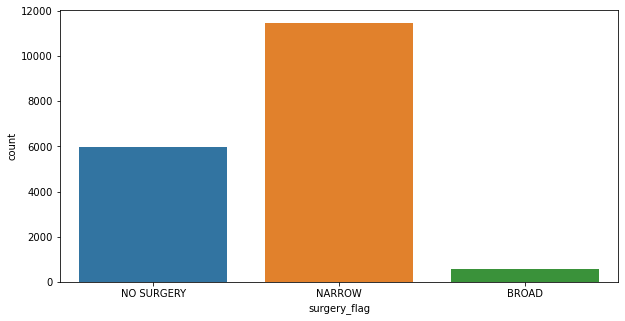

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='surgery_flag',data=df)
plt.show()

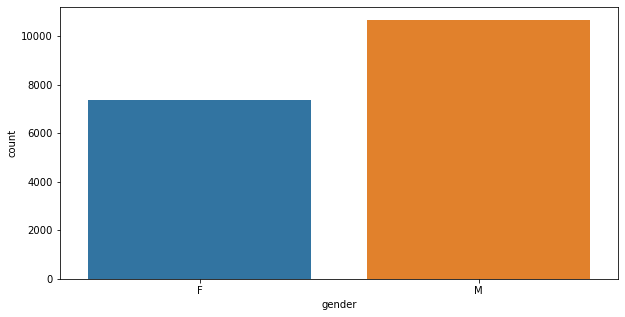

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender',data=df)
plt.show()

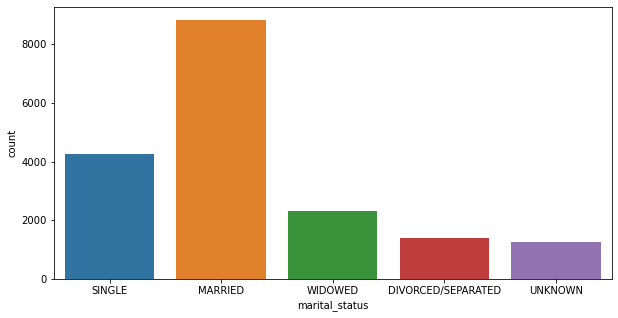

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='marital_status',data=df)
plt.show()

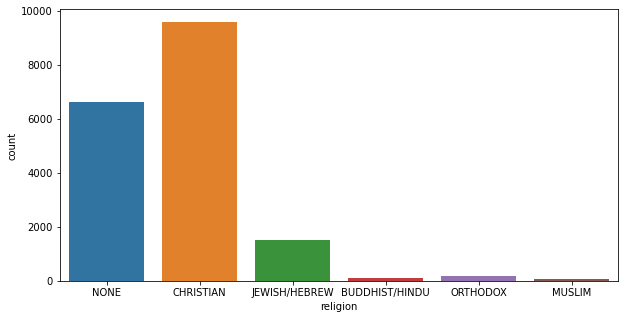

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='religion',data=df)
plt.show()

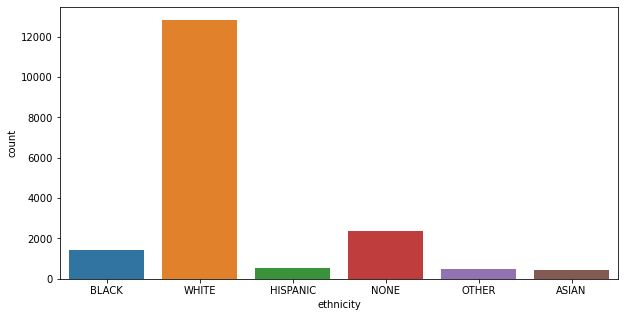

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='ethnicity',data=df)
plt.show()

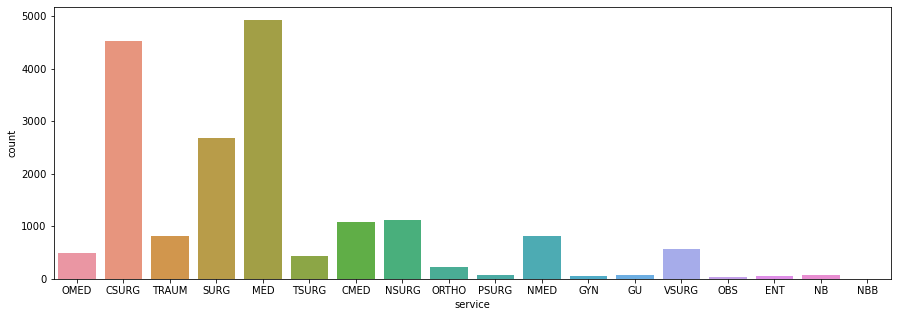

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='service',data=df)
plt.show()

In [17]:
df['service'].unique()

array(['OMED', 'CSURG', 'TRAUM', 'SURG', 'MED', 'TSURG', 'CMED', 'NSURG',
       'ORTHO', 'PSURG', 'NMED', 'GYN', 'GU', 'VSURG', 'OBS', 'ENT', 'NB',
       'NBB'], dtype=object)

In [18]:
df.loc[df['service'] == 'NBB', 'service'] = 'NB'

In [19]:
df['icd9_group'].unique()

array(['diseases of the respiratory system',
       'diseases of the circulatory system', 'injury and poisoning',
       'symptoms, signs, and ill-defined conditions',
       'infectious and parasitic diseases',
       'diseases of the nervous system and sense organs', 'neoplasms',
       'diseases of the digestive system',
       'complications of pregnancy, childbirth, and the puerperium',
       'diseases of the musculoskeletal system and connective tissue',
       'diseases of the genitourinary system',
       'diseases of the skin and subcutaneous tissue', 'mental disorders',
       'congenital anomalies',
       'endocrine, nutritional and metabolic diseases, and immunity disorders',
       'supplementary classification of factors influencing health status',
       nan, 'diseases of the blood and blood-forming organs',
       'certain conditions originating in the perinatal period'],
      dtype=object)

## **QUANTITATIVE DATA ANALYSIS**

In [20]:
df.select_dtypes(include=['float64']).head()

,avg_sys_press,std_sys_press,los,total_los_days,avg_temp,std_temp,avg_creatinine,std_creatinine,avg_white_blood_cells,std_white_blood_cells,avg_blood_glucose,std_blood_glucose,avg_bicarbonate,std_bicarbonate,avg_resp_rate,std_resp_rate,avg_hr,std_hr,age,avg_platelet_count,std_platelet_count,avg_hematocrit,std_hematocrit,avg_albumin,std_albumin,avg_cvp,std_cvp,oasis_avg,sofa_avg,saps_avg,avg_sodium,std_sodium,total_mech_vent_time,avg_spo2,std_spo2,avg_potassium,std_potassium,avg_blood_urea_nitrogen,std_blood_urea_nitrogen,avg_art_ph,std_art_ph,avg_dias_press,std_dias_press
0,140.509,12.973,4.978,12.062,NaN,NaN,0.638,0.077,9.700,2.840,105.000,33.578,29.385,3.990,18.647,3.331,108.630,9.945,48.950,228.615,35.999,31.854,2.733,2.00,NaN,NaN,NaN,23.0,0.0,10.0,131.385,1.981,2.00,97.862,2.565,4.077,0.298,17.077,3.226,7.38,0.037,82.170,12.499
1,110.544,12.652,2.491,4.903,NaN,NaN,0.783,0.041,12.386,2.927,152.235,42.697,25.200,1.924,23.516,6.409,68.969,12.208,60.837,142.571,28.815,35.914,3.575,4.30,NaN,9.526,5.957,31.0,5.0,17.0,137.714,3.039,4.75,96.175,2.028,4.243,0.223,17.000,3.633,NaN,NaN,51.175,6.118
2,143.305,16.706,11.503,14.398,NaN,NaN,0.818,0.272,11.829,3.451,132.458,19.834,27.188,2.287,21.257,6.281,95.352,12.150,21.518,518.059,419.045,27.563,5.554,2.45,0.071,NaN,NaN,31.0,2.0,21.0,138.037,1.911,214.00,99.095,1.979,4.085,0.474,11.765,2.107,NaN,NaN,69.480,12.061
3,115.642,14.141,3.576,10.112,NaN,NaN,0.845,0.129,8.931,2.450,111.167,14.288,26.556,3.779,14.427,3.893,80.516,8.053,67.758,198.385,65.724,28.487,4.720,3.85,0.354,10.111,4.851,41.0,4.0,23.0,132.929,2.165,6.90,98.097,3.297,4.186,0.382,12.909,1.868,NaN,NaN,56.358,9.841
4,113.839,14.248,6.173,6.174,NaN,NaN,1.112,0.064,10.486,1.346,81.750,14.830,24.000,1.069,15.270,4.735,86.872,10.507,55.549,160.000,16.248,30.714,2.204,1.60,NaN,NaN,NaN,39.0,5.0,16.0,134.750,2.188,89.00,98.872,1.527,4.288,0.442,42.000,9.055,NaN,NaN,71.573,12.049


In [21]:
l = [col for col in df.columns if col.startswith('std_')]
df.drop(columns=l, inplace=True)

In [22]:
l = {col:col[4:] for col in df.columns if col.startswith('avg_')}
df.rename(columns=l, inplace=True)

In [23]:
l = {col:col[:-4] for col in df.columns if col.endswith('_avg')}
df.rename(columns=l, inplace=True)

In [24]:
df.select_dtypes(include=['float64']).head()

,sys_press,los,total_los_days,temp,creatinine,white_blood_cells,blood_glucose,bicarbonate,resp_rate,hr,age,platelet_count,hematocrit,albumin,cvp,oasis,sofa,saps,sodium,total_mech_vent_time,spo2,potassium,blood_urea_nitrogen,art_ph,dias_press
0,140.509,4.978,12.062,NaN,0.638,9.700,105.000,29.385,18.647,108.630,48.950,228.615,31.854,2.00,NaN,23.0,0.0,10.0,131.385,2.00,97.862,4.077,17.077,7.38,82.170
1,110.544,2.491,4.903,NaN,0.783,12.386,152.235,25.200,23.516,68.969,60.837,142.571,35.914,4.30,9.526,31.0,5.0,17.0,137.714,4.75,96.175,4.243,17.000,NaN,51.175
2,143.305,11.503,14.398,NaN,0.818,11.829,132.458,27.188,21.257,95.352,21.518,518.059,27.563,2.45,NaN,31.0,2.0,21.0,138.037,214.00,99.095,4.085,11.765,NaN,69.480
3,115.642,3.576,10.112,NaN,0.845,8.931,111.167,26.556,14.427,80.516,67.758,198.385,28.487,3.85,10.111,41.0,4.0,23.0,132.929,6.90,98.097,4.186,12.909,NaN,56.358
4,113.839,6.173,6.174,NaN,1.112,10.486,81.750,24.000,15.270,86.872,55.549,160.000,30.714,1.60,NaN,39.0,5.0,16.0,134.750,89.00,98.872,4.288,42.000,NaN,71.573


In [25]:
df['age'] = df1['age'].astype('int')

In [26]:
df.rename(columns={'los':'icu_los'}, inplace=True)

In [27]:
df.drop(columns=['total_los_days'], inplace=True)

In [28]:
idx = df.loc[df['icu_los'] == 0].index
df.drop(idx, inplace=True)
df.reset_index(drop=True, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18032 entries, 0 to 18031
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sys_press             17951 non-null  float64
 1   icu_los               18032 non-null  float64
 2   temp                  4001 non-null   float64
 3   creatinine            18032 non-null  float64
 4   white_blood_cells     18032 non-null  float64
 5   blood_glucose         18032 non-null  float64
 6   bicarbonate           18031 non-null  float64
 7   procedure_count       18032 non-null  int64  
 8   resp_rate             18026 non-null  float64
 9   hr                    18031 non-null  float64
 10  surgery_flag          18032 non-null  object 
 11  age                   18032 non-null  int64  
 12  gender                18032 non-null  object 
 13  marital_status        18032 non-null  object 
 14  religion              18032 non-null  object 
 15  ethnicity          

In [30]:
df.drop(columns=['temp', 'cvp'], inplace=True)

In [31]:
# art_ph
idx = df[(df['art_ph'] < 0) | (df['art_ph'] > 14)].index
df.drop(idx, inplace=True)
df.reset_index(drop=True, inplace=True)

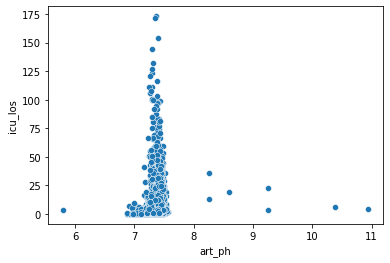

In [32]:
sns.scatterplot(x='art_ph', y='icu_los', data=df)
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18022 entries, 0 to 18021
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sys_press             17941 non-null  float64
 1   icu_los               18022 non-null  float64
 2   creatinine            18022 non-null  float64
 3   white_blood_cells     18022 non-null  float64
 4   blood_glucose         18022 non-null  float64
 5   bicarbonate           18021 non-null  float64
 6   procedure_count       18022 non-null  int64  
 7   resp_rate             18016 non-null  float64
 8   hr                    18021 non-null  float64
 9   surgery_flag          18022 non-null  object 
 10  age                   18022 non-null  int64  
 11  gender                18022 non-null  object 
 12  marital_status        18022 non-null  object 
 13  religion              18022 non-null  object 
 14  ethnicity             18022 non-null  object 
 15  platelet_count     

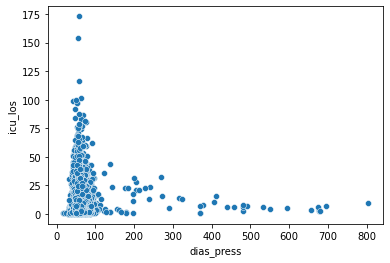

In [34]:
sns.scatterplot(x='dias_press', y='icu_los', data=df)
plt.show()

In [35]:
idx = df[df['dias_press'] > df['sys_press']].index
df.drop(idx, inplace=True)
df.reset_index(drop=True, inplace=True)

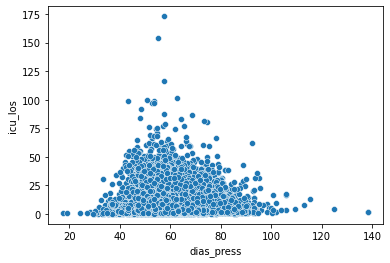

In [36]:
sns.scatterplot(x='dias_press', y='icu_los', data=df)
plt.show()

In [37]:
# Potassium

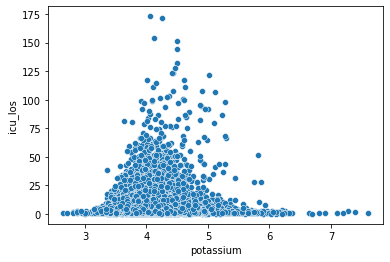

In [38]:
# Normal Potassium level in blood is 3.6 to 5.2 units
sns.scatterplot(x='potassium', y='icu_los', data=df)
plt.show()

In [39]:
# Hematocrit - percentage of red blood cells in the blood

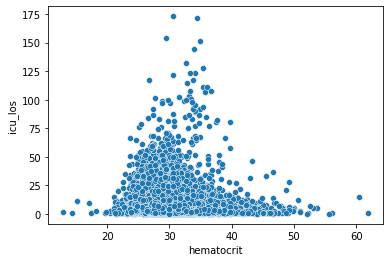

In [40]:
# Normal range of hematocrit for men is 41% to 50% and women is 36% to 48%
sns.scatterplot(x='hematocrit', y='icu_los', data=df)
plt.show()

In [41]:
# White Blood Cells

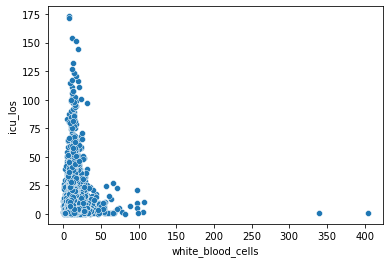

In [42]:
# Normal range of WBCs in the blood is 4.5 to 11
# Very high WBC counts over 100 generally occur with conditions like leukemia or other 
# types of blood and bone marrow cancer
sns.scatterplot(x='white_blood_cells', y='icu_los', data=df)
plt.show()

In [43]:
upperlimit = round(np.percentile(df['white_blood_cells'],99.99), 1)
print("Upperlimit : "+str(upperlimit))
print("Outliers : "+str(df[df['white_blood_cells'] > upperlimit].shape[0]))

Upperlimit : 154.6
Outliers : 2


In [44]:
df.loc[df['white_blood_cells'] > upperlimit, 'white_blood_cells'] = upperlimit

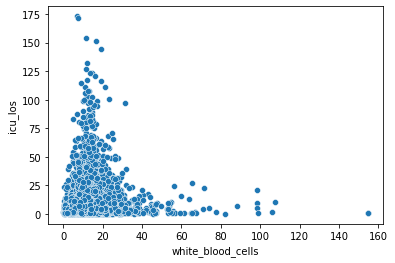

In [45]:
sns.scatterplot(x='white_blood_cells', y='icu_los', data=df)
plt.show()

In [46]:
# Glucose

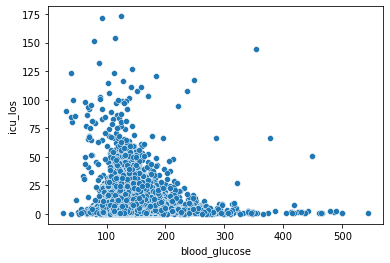

In [47]:
# A blood sugar level less than 105 units is normal
sns.scatterplot(x='blood_glucose', y='icu_los', data=df)
plt.show()

In [48]:
# Ventilator Time

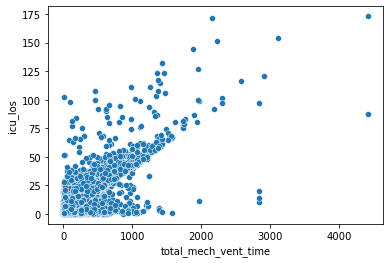

In [49]:
sns.scatterplot(x='total_mech_vent_time', y='icu_los', data=df)
plt.show()

In [50]:
upperlimit = np.percentile(df['total_mech_vent_time'], 99.99)
idx = df[df['total_mech_vent_time'] > upperlimit].index
df.drop(idx, inplace=True)
df.reset_index(drop=True, inplace=True)

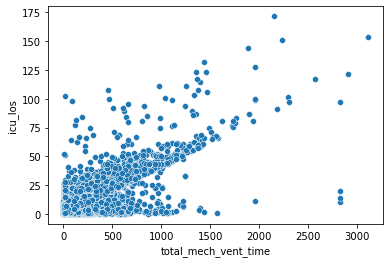

In [51]:
sns.scatterplot(x='total_mech_vent_time', y='icu_los', data=df)
plt.show()

In [52]:
# Heart Rate

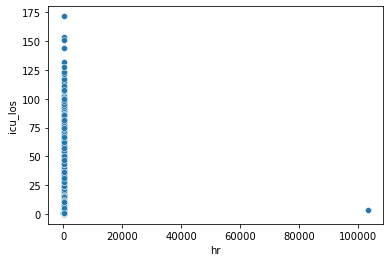

In [53]:
sns.scatterplot(x='hr', y='icu_los', data=df)
plt.show()

In [54]:
# Heart rate above 220 is not impossible
idx = df[df['hr'] > 220].index
df.drop(idx, inplace=True)
df.reset_index(drop=True, inplace=True)

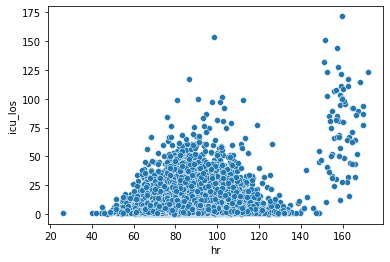

In [55]:
sns.scatterplot(x='hr', y='icu_los', data=df)
plt.show()

In [56]:
# Rate of Respiration

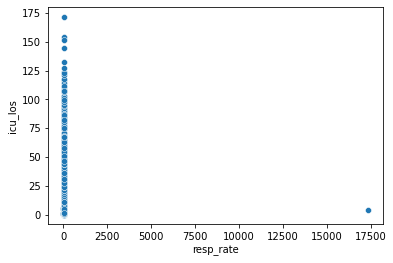

In [57]:
sns.scatterplot(x='resp_rate', y='icu_los', data=df)
plt.show()

In [58]:
idx = df[df['resp_rate'] > 65].index
df.drop(idx, inplace=True)
df.reset_index(drop=True, inplace=True)

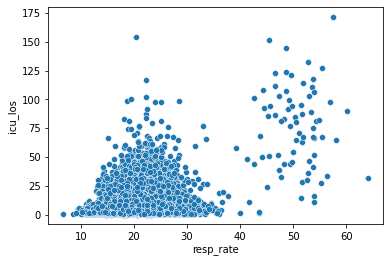

In [59]:
sns.scatterplot(x='resp_rate', y='icu_los', data=df)
plt.show()

In [60]:
# Blood Urea Nitrogen

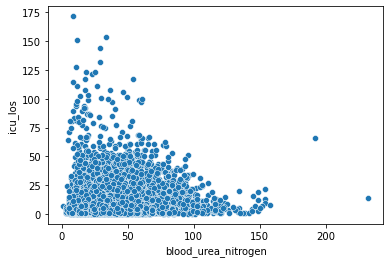

In [61]:
# Range of normal blood urea nitrogen level is around 6 to 24 units
sns.scatterplot(x='blood_urea_nitrogen', y='icu_los', data=df)
plt.show()

In [62]:
# Oxygen Saturation

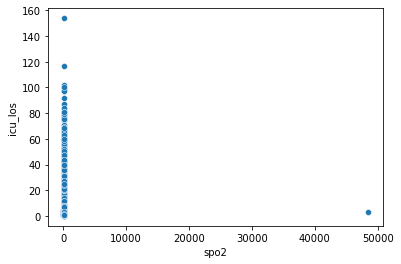

In [63]:
sns.scatterplot(x='spo2', y='icu_los', data=df)
plt.show()

In [64]:
# SPO2 levels above 100% is not possible.
idx = df[df['spo2'] > 100].index
df.drop(idx, inplace=True)
df.reset_index(drop=True, inplace=True)

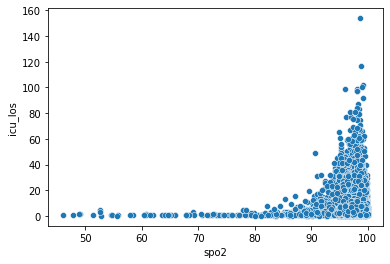

In [65]:
sns.scatterplot(x='spo2', y='icu_los', data=df)
plt.show()

In [66]:
# Systolic Blood Pressure

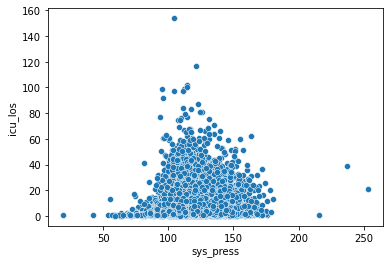

In [67]:
sns.scatterplot(x='sys_press', y='icu_los', data=df)
plt.show()

In [68]:
# Bicarbonate

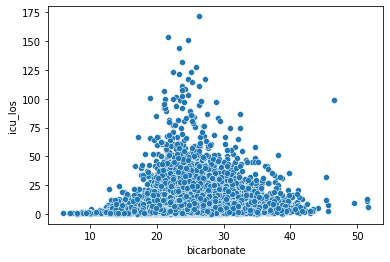

In [69]:
# Carbon Dioxide level in the blood
# Normal bicarbonate level range is 23 to 30 units in adults.
sns.scatterplot(x='bicarbonate', y='icu_los', data=df)
plt.show()

In [70]:
# Albumin - a protein made by liver

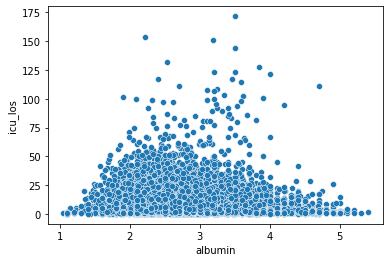

In [71]:
# The normal range of albumin content in blood is 3.4 to 5.4 units
sns.scatterplot(x='albumin', y='icu_los', data=df)
plt.show()

In [72]:
# Creatinine - a chemical compound left over from energy-producing processes in your muscles.

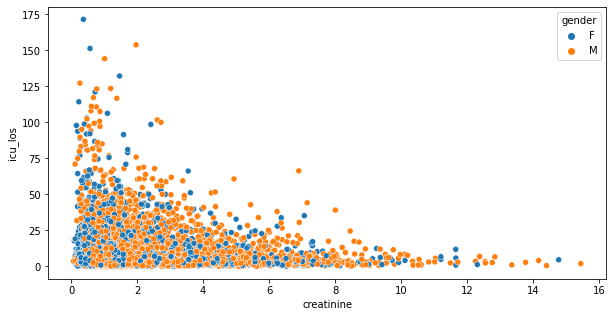

In [73]:
# The normal range of creatinine for men is 0.74 to 1.35 units
# The normal range of creatinine for women is 0.59 to 1.04 units
plt.figure(figsize=(10,5))
sns.scatterplot(x='creatinine', y='icu_los', hue='gender', data=df)
plt.show()

In [74]:
# Sodium

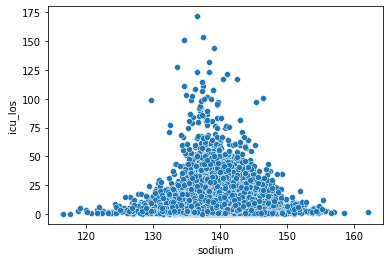

In [75]:
# A normal blood sodium level is between 135 and 145 units
sns.scatterplot(x='sodium', y='icu_los', data=df)
plt.show()

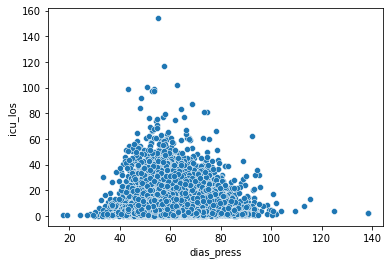

In [76]:
sns.scatterplot(x='dias_press', y='icu_los', data=df)
plt.show()

In [77]:
# Platelet Count

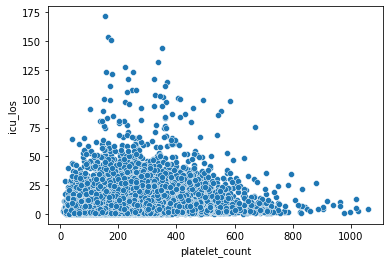

In [78]:
# A normal platelet count ranges from 150 to 450 units
sns.scatterplot(x='platelet_count', y='icu_los', data=df)
plt.show()

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17945 entries, 0 to 17944
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sys_press             17864 non-null  float64
 1   icu_los               17945 non-null  float64
 2   creatinine            17945 non-null  float64
 3   white_blood_cells     17945 non-null  float64
 4   blood_glucose         17945 non-null  float64
 5   bicarbonate           17944 non-null  float64
 6   procedure_count       17945 non-null  int64  
 7   resp_rate             17939 non-null  float64
 8   hr                    17944 non-null  float64
 9   surgery_flag          17945 non-null  object 
 10  age                   17945 non-null  int64  
 11  gender                17945 non-null  object 
 12  marital_status        17945 non-null  object 
 13  religion              17945 non-null  object 
 14  ethnicity             17945 non-null  object 
 15  platelet_count     

In [80]:
df.drop(columns=['art_ph'], inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17945 entries, 0 to 17944
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sys_press             17864 non-null  float64
 1   icu_los               17945 non-null  float64
 2   creatinine            17945 non-null  float64
 3   white_blood_cells     17945 non-null  float64
 4   blood_glucose         17945 non-null  float64
 5   bicarbonate           17944 non-null  float64
 6   procedure_count       17945 non-null  int64  
 7   resp_rate             17939 non-null  float64
 8   hr                    17944 non-null  float64
 9   surgery_flag          17945 non-null  object 
 10  age                   17945 non-null  int64  
 11  gender                17945 non-null  object 
 12  marital_status        17945 non-null  object 
 13  religion              17945 non-null  object 
 14  ethnicity             17945 non-null  object 
 15  platelet_count     

In [82]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [83]:
df.shape

(17826, 30)

**Correlation**

In [84]:
# Correlation matrix
corr = df.corr()

In [85]:
corr[corr > 0.6]

,sys_press,icu_los,creatinine,white_blood_cells,blood_glucose,bicarbonate,procedure_count,resp_rate,hr,age,platelet_count,hematocrit,albumin,oasis,sofa,saps,sodium,total_mech_vent_time,spo2,potassium,admissions_count,blood_urea_nitrogen,dias_press
sys_press,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
icu_los,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.823977,NaN,NaN,NaN,NaN,NaN
creatinine,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.61936,NaN
white_blood_cells,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blood_glucose,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bicarbonate,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
procedure_count,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resp_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
corr[corr < -0.6]

,sys_press,icu_los,creatinine,white_blood_cells,blood_glucose,bicarbonate,procedure_count,resp_rate,hr,age,platelet_count,hematocrit,albumin,oasis,sofa,saps,sodium,total_mech_vent_time,spo2,potassium,admissions_count,blood_urea_nitrogen,dias_press
sys_press,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
icu_los,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creatinine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
white_blood_cells,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blood_glucose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bicarbonate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
procedure_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resp_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df.drop(columns=['saps', 'creatinine'], inplace=True)

In [88]:
df.shape

(17826, 28)

In [89]:
df2 = df.copy()

In [90]:
def label(data, n1, n2):
    if data['icu_los'] < n1:
        return 0
    elif data['icu_los'] >= n1 and data['icu_los'] < n2:
        return 1
    else:
        return 2
df['icu_los'] = df.apply(lambda df: label(df, n1=3, n2=7), axis=1)

In [91]:
df['icu_los'].value_counts()

0    6784
2    5758
1    5284
Name: icu_los, dtype: int64

In [92]:
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(include=['float64', 'int64'])
cat_df = pd.merge(cat_df, num_df['icu_los'], left_index=True, right_index=True)

In [93]:
cat_df.head()

,surgery_flag,gender,marital_status,religion,ethnicity,service,icd9_group,icu_los
0,NO SURGERY,F,SINGLE,NONE,BLACK,OMED,diseases of the respiratory system,1
1,NARROW,M,MARRIED,CHRISTIAN,WHITE,CSURG,diseases of the circulatory system,0
2,NARROW,M,SINGLE,NONE,HISPANIC,TRAUM,injury and poisoning,2
3,NARROW,M,MARRIED,CHRISTIAN,WHITE,SURG,diseases of the circulatory system,1
4,NARROW,M,SINGLE,CHRISTIAN,WHITE,MED,diseases of the respiratory system,1


In [94]:
num_df.head()

,sys_press,icu_los,white_blood_cells,blood_glucose,bicarbonate,procedure_count,resp_rate,hr,age,platelet_count,hematocrit,albumin,oasis,sofa,sodium,total_mech_vent_time,spo2,potassium,admissions_count,blood_urea_nitrogen,dias_press
0,140.509,1,9.700,105.000,29.385,2,18.647,108.630,48,228.615,31.854,2.00,23.0,0.0,131.385,2.00,97.862,4.077,1,17.077,82.170
1,110.544,0,12.386,152.235,25.200,4,23.516,68.969,60,142.571,35.914,4.30,31.0,5.0,137.714,4.75,96.175,4.243,1,17.000,51.175
2,143.305,2,11.829,132.458,27.188,15,21.257,95.352,21,518.059,27.563,2.45,31.0,2.0,138.037,214.00,99.095,4.085,1,11.765,69.480
3,115.642,1,8.931,111.167,26.556,4,14.427,80.516,67,198.385,28.487,3.85,41.0,4.0,132.929,6.90,98.097,4.186,1,12.909,56.358
4,113.839,1,10.486,81.750,24.000,5,15.270,86.872,55,160.000,30.714,1.60,39.0,5.0,134.750,89.00,98.872,4.288,1,42.000,71.573


In [95]:
X = cat_df.drop('icu_los', axis=1)
print('Categorical Columns:', list(X.columns))
y = cat_df['icu_los']

encoder = LabelEncoder()
for col in X.columns:
    X[col] = encoder.fit_transform(X[col])
    
selector = SelectKBest(chi2, k=2).fit(X, y)
selected_features_cat = list(X.columns[selector.get_support(indices=True)])
print('Selected Categorical Columns:', list(selected_features_cat))

scores = selector.scores_
pvalues = selector.pvalues_
result = {'Feature':X.columns, 'Chi-score':scores, 'P-value':pvalues}
resultdf = pd.DataFrame(result)

Categorical Columns: ['surgery_flag', 'gender', 'marital_status', 'religion', 'ethnicity', 'service', 'icd9_group']
Selected Categorical Columns: ['service', 'icd9_group']


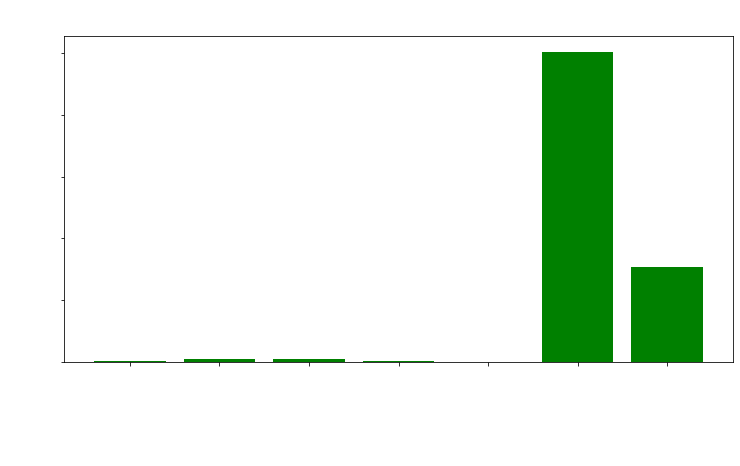

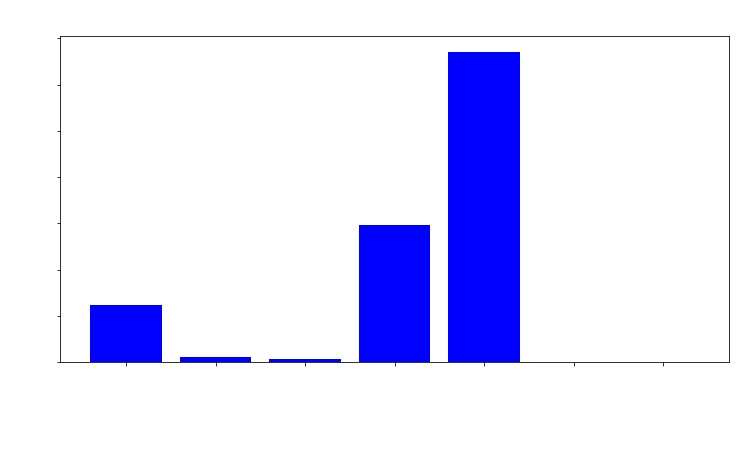

In [96]:
plt.figure(figsize=(12,6))
plt.bar(resultdf['Feature'], resultdf['Chi-score'], color='green')
plt.xlabel('Category', color='white', size=15)
plt.ylabel('Chi-Squared Score', color='white', size=15)
plt.title('Chi-Squared Score by Category', color='white', size=30)
plt.xticks(rotation=45, ha='right', color='white', size=12)
plt.yticks(color='white', size=12)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(resultdf['Feature'], resultdf['P-value'], color='blue')
plt.xlabel('Category', color='white', size=15)
plt.ylabel('P-Value', color='white', size=15)
plt.title('P-Value by Category', color='white', size=30)
plt.xticks(rotation=45, ha='right', color='white', size=12)
plt.yticks(color='white', size=12)
plt.show()

In [97]:
X = num_df.drop(columns=['icu_los'], axis=1)
y = num_df['icu_los']
    
selector = SelectKBest(f_classif, k=10).fit(X, y)
selected_features_num = list(X.columns[selector.get_support(indices=True)])

scores = selector.scores_
pvalues = selector.pvalues_
result = {'Feature':X.columns, 'F-score':scores, 'P-value':pvalues}
resultdf = pd.DataFrame(result)

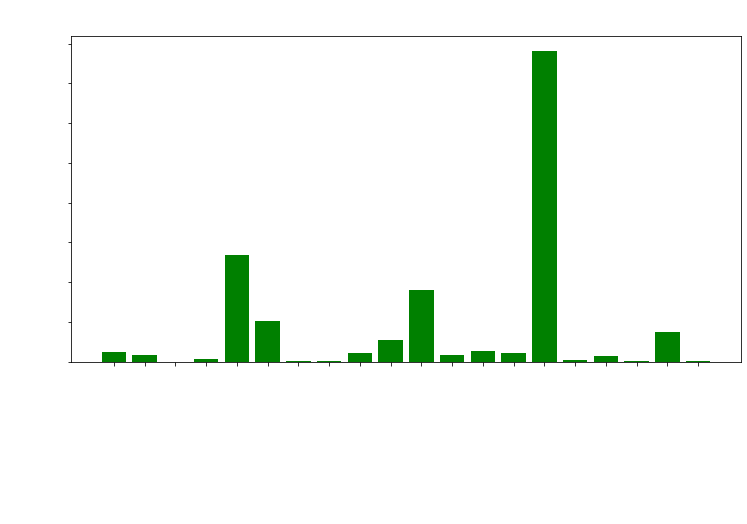

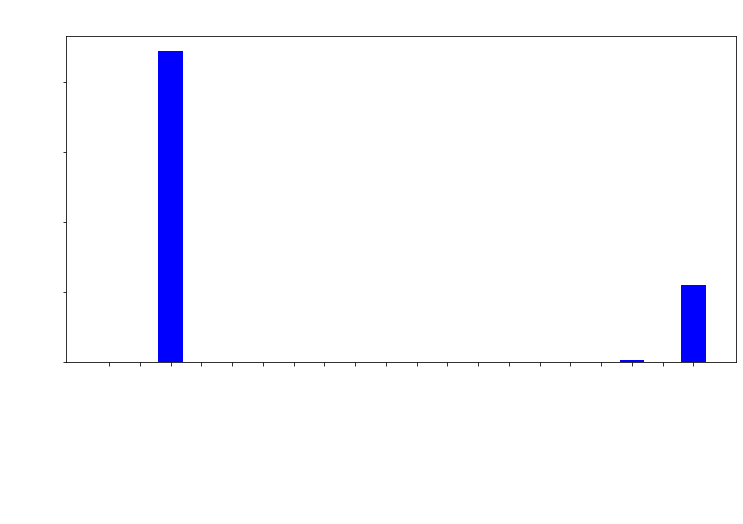

In [98]:
plt.figure(figsize=(12,6))
plt.bar(result['Feature'], result['F-score'], color='green')
plt.xlabel('Category', color='white', size=15)
plt.ylabel('F-Score', color='white', size=15)
plt.title('F-Score by Category', color='white', size=30)
plt.xticks(rotation=45, ha='right', color='white', size=15)
plt.yticks(color='white', size=15)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(result['Feature'], result['P-value'], color='blue')
plt.xlabel('Category', color='white', size=15)
plt.ylabel('P-Value', color='white', size=15)
plt.title('P-Value by Category', color='white', size=30)
plt.xticks(rotation=45, ha='right', color='white', size=15)
plt.yticks(color='white', size=15)
plt.show()

In [99]:
selected_features = selected_features_cat + selected_features_num + ['icu_los']
df = df.loc[:, selected_features]

In [100]:
df.head()

,service,icd9_group,sys_press,procedure_count,resp_rate,platelet_count,hematocrit,albumin,sofa,sodium,total_mech_vent_time,blood_urea_nitrogen,icu_los
0,OMED,diseases of the respiratory system,140.509,2,18.647,228.615,31.854,2.00,0.0,131.385,2.00,17.077,1
1,CSURG,diseases of the circulatory system,110.544,4,23.516,142.571,35.914,4.30,5.0,137.714,4.75,17.000,0
2,TRAUM,injury and poisoning,143.305,15,21.257,518.059,27.563,2.45,2.0,138.037,214.00,11.765,2
3,SURG,diseases of the circulatory system,115.642,4,14.427,198.385,28.487,3.85,4.0,132.929,6.90,12.909,1
4,MED,diseases of the respiratory system,113.839,5,15.270,160.000,30.714,1.60,5.0,134.750,89.00,42.000,1


In [101]:
df['service'].describe()

count     17826
unique       16
top         MED
freq       4877
Name: service, dtype: object

In [102]:
df['icd9_group'].describe()

count                                  17826
unique                                    17
top       diseases of the circulatory system
freq                                    6687
Name: icd9_group, dtype: object

In [103]:
def recategorise(df, column, threshold=0.80):
    threshold_value = int(threshold*len(df[column]))
    categories_list = []
    s = 0
    counts = dict(df[column].value_counts())
    for key, value in counts.items():
        s = s + value
        if s < threshold_value:
            categories_list.append(key)
        else:
            break
    
    categories_list.append('Other')
    new_column = [x if x in categories_list else 'Other' for x in df[column]]
    return new_column, categories_list

In [104]:
icd9_col, icd9_cat = recategorise(df, 'icd9_group')
service_col, service_cat = recategorise(df, 'service')
print('new icd9 group categries:', len(icd9_cat))
print('new service categries:', len(service_cat))

new icd9 group categries: 5
new service categries: 6


In [105]:
print('New icd9 categories:')
for cat in icd9_cat:
    print('  ',cat)
print('New service categories:')
for cat in service_cat:
    print('  ',cat)

New icd9 categories:
   diseases of the circulatory system
   injury and poisoning
   infectious and parasitic diseases
   diseases of the respiratory system
   Other
New service categories:
   MED
   CSURG
   SURG
   NSURG
   CMED
   Other


In [106]:
df['icd9_groups'] = icd9_col
df['services'] = service_col

In [107]:
df['icd9_groups'].value_counts()

diseases of the circulatory system    6687
Other                                 4486
injury and poisoning                  2708
infectious and parasitic diseases     2012
diseases of the respiratory system    1933
Name: icd9_groups, dtype: int64

In [108]:
df['services'].value_counts()

MED      4877
CSURG    4523
Other    3586
SURG     2657
NSURG    1107
CMED     1076
Name: services, dtype: int64

In [109]:
df.drop(columns=['icd9_group'], inplace=True)
df.drop(columns=['service'], inplace=True)

In [110]:
df.head()

,sys_press,procedure_count,resp_rate,platelet_count,hematocrit,albumin,sofa,sodium,total_mech_vent_time,blood_urea_nitrogen,icu_los,icd9_groups,services
0,140.509,2,18.647,228.615,31.854,2.00,0.0,131.385,2.00,17.077,1,diseases of the respiratory system,Other
1,110.544,4,23.516,142.571,35.914,4.30,5.0,137.714,4.75,17.000,0,diseases of the circulatory system,CSURG
2,143.305,15,21.257,518.059,27.563,2.45,2.0,138.037,214.00,11.765,2,injury and poisoning,Other
3,115.642,4,14.427,198.385,28.487,3.85,4.0,132.929,6.90,12.909,1,diseases of the circulatory system,SURG
4,113.839,5,15.270,160.000,30.714,1.60,5.0,134.750,89.00,42.000,1,diseases of the respiratory system,MED


In [111]:
df3 = df.copy()

In [112]:
df = pd.get_dummies(df, drop_first=True)

In [113]:
df.head()

,sys_press,procedure_count,resp_rate,platelet_count,hematocrit,albumin,sofa,sodium,total_mech_vent_time,blood_urea_nitrogen,icu_los,icd9_groups_diseases of the circulatory system,icd9_groups_diseases of the respiratory system,icd9_groups_infectious and parasitic diseases,icd9_groups_injury and poisoning,services_CSURG,services_MED,services_NSURG,services_Other,services_SURG
0,140.509,2,18.647,228.615,31.854,2.00,0.0,131.385,2.00,17.077,1,0,1,0,0,0,0,0,1,0
1,110.544,4,23.516,142.571,35.914,4.30,5.0,137.714,4.75,17.000,0,1,0,0,0,1,0,0,0,0
2,143.305,15,21.257,518.059,27.563,2.45,2.0,138.037,214.00,11.765,2,0,0,0,1,0,0,0,1,0
3,115.642,4,14.427,198.385,28.487,3.85,4.0,132.929,6.90,12.909,1,1,0,0,0,0,0,0,0,1
4,113.839,5,15.270,160.000,30.714,1.60,5.0,134.750,89.00,42.000,1,0,1,0,0,0,1,0,0,0


In [114]:
df.shape

(17826, 20)

In [115]:
X = df.drop(columns=['icu_los'])
y = df['icu_los']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=state)

print('train set:', X_train.shape)
print('test set:', X_test.shape)

train set: (15152, 19)
test set: (2674, 19)


In [116]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
y_train.value_counts(normalize=True).apply(lambda x : round(x*100, 2))

0    38.06
2    32.13
1    29.80
Name: icu_los, dtype: float64

In [118]:
KMS = KMeansSMOTE(random_state=state)
X_train, y_train = KMS.fit_resample(X_train, y_train)

### Model Creation

###### Logistic Regression

In [119]:
model1 = LogisticRegression().fit(X_train, y_train)

In [120]:
def accuracy(X, y, model):
    return round(model.score(X, y)*100, 1)

In [121]:
print('train:',accuracy(X_train, y_train, model1))
print('test:',accuracy(X_test, y_test, model1))

train: 65.8
test: 62.5


###### K Nearest Neighbors

In [122]:
model2 = KNeighborsClassifier().fit(X_train, y_train)
print('train:',accuracy(X_train, y_train, model2))
print('test:',accuracy(X_test, y_test, model2))

train: 73.1
test: 55.1


In [123]:
estimator = KNeighborsClassifier()
param_name = 'n_neighbors'
param_range = range(5,20,2)
train_scores, val_scores = validation_curve(estimator=estimator, 
                                            X=X_train, 
                                            y=y_train, 
                                            param_name=param_name, 
                                            param_range=param_range, 
                                            cv=5, 
                                            scoring='accuracy')

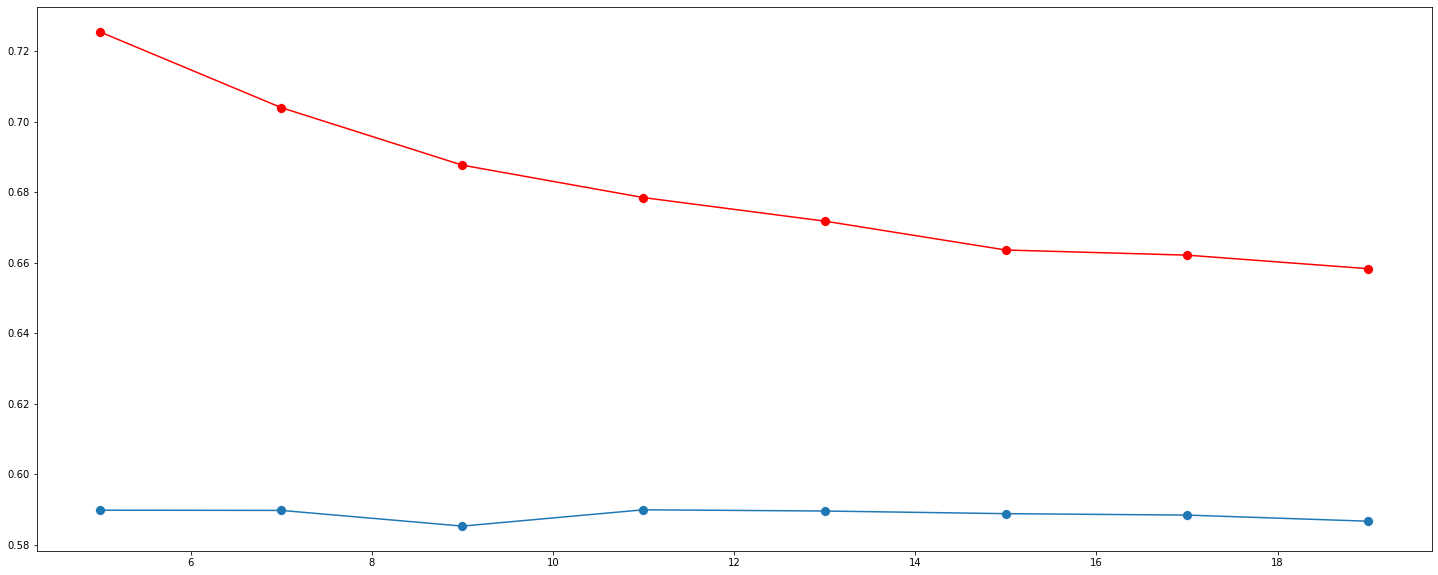

In [124]:
plt.figure(figsize=(25,10))
sns.scatterplot(x=param_range, y=val_scores.mean(axis=1), s=100)
sns.lineplot(x=param_range, y=val_scores.mean(axis=1))
sns.scatterplot(x=param_range, y=train_scores.mean(axis=1), s=100, color='red')
sns.lineplot(x=param_range, y=train_scores.mean(axis=1), color='red')
plt.show()

###### Decision Tree

In [125]:
model3 = DecisionTreeClassifier(random_state=state).fit(X_train,y_train)
print('train:',accuracy(X_train, y_train, model3))
print('test:',accuracy(X_test, y_test, model3))
print('tree depth:', model3.get_depth())

train: 94.3
test: 56.2
tree depth: 35


###### Decision Tree [Pre-Pruning]

In [126]:
print(X_train.shape[0])

17307


In [127]:
estimator = DecisionTreeClassifier(random_state=state)
depth = np.arange(5, 10, 1)
samples = np.arange(10, 200, 10)
params = {'max_depth':depth, 'min_samples_split':samples}
gridsearch = GridSearchCV(estimator=estimator, 
                          param_grid=params, 
                          cv=5,
                          n_jobs=-1).fit(X_train, y_train)

In [128]:
best_estimator = gridsearch.best_estimator_
print('best hyperparameters:', gridsearch.best_params_)
max_depth = gridsearch.best_params_['max_depth']
min_samples_split = gridsearch.best_params_['min_samples_split']
print('train:',accuracy(X_train, y_train, best_estimator))
print('test:',accuracy(X_test, y_test, best_estimator))

best hyperparameters: {'max_depth': 6, 'min_samples_split': 120}
train: 70.8
test: 68.5


###### Decision Tree [Post-Pruning, cost complexity pruning]

In [129]:
model3 = DecisionTreeClassifier(max_depth=max_depth, 
                                min_samples_split=min_samples_split, 
                                random_state=state)
path = model3.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[1:-1]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=state)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

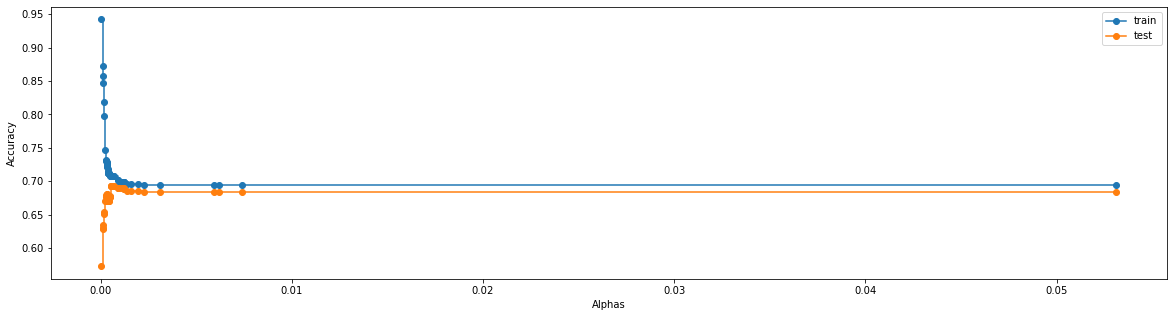

In [130]:
fig, ax = plt.subplots(figsize=(20,5))
ax.set_xlabel("Alphas")
ax.set_ylabel("Accuracy")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [131]:
print('best test accuracy:', round(max(test_scores)*100,1))
best_alpha = ccp_alphas[np.argmax(test_scores)]
print('best alpha:',best_alpha)

best test accuracy: 69.2
best alpha: 0.0005376781530755867


In [132]:
model3 = DecisionTreeClassifier(max_depth=max_depth, 
                                min_samples_split=min_samples_split, 
                                ccp_alpha=best_alpha, 
                                random_state=state).fit(X_train, y_train)
print('train:',round(model3.score(X_train, y_train)*100, 1))
print('test:',round(model3.score(X_test, y_test)*100, 1))

train: 70.1
test: 69.0


In [133]:
estimator = DecisionTreeClassifier(max_depth=max_depth, 
                                   min_samples_split=min_samples_split, 
                                   random_state=state)
param = {'ccp_alpha':ccp_alphas}
gridsearch = GridSearchCV(estimator=estimator, 
                          param_grid=param, 
                          cv=5, 
                          n_jobs=-1).fit(X_train, y_train)

In [134]:
best_alpha = gridsearch.best_params_['ccp_alpha']
print('best alpha:', best_alpha)

best alpha: 0.0002485002398332249


In [135]:
model3 = gridsearch.best_estimator_
print('train:',accuracy(X_train, y_train, model3))
print('test:',accuracy(X_test, y_test, model3))

train: 70.8
test: 68.5


###### Random Forest

In [136]:
model4 = RandomForestClassifier(max_depth=max_depth, 
                                min_samples_split=min_samples_split, 
                                ccp_alpha=best_alpha, 
                                oob_score=True, 
                                random_state=state).fit(X_train,y_train)
print('train:',accuracy(X_train, y_train, model4))
print('test:',accuracy(X_test, y_test, model4))
print('oob_score:', round(model4.oob_score_*100, 1))

train: 72.2
test: 69.5
oob_score: 71.0


###### Adaptive Boosting

In [137]:
model0 = AdaBoostClassifier(random_state=state).fit(X_train, y_train)
print('train:',accuracy(X_train, y_train, model0))
print('test:',accuracy(X_test, y_test, model0))

train: 69.9
test: 68.2


In [138]:
learning_rate = np.linspace(0.1, 1, 5)
n_estimators = np.arange(50, 401, 50)
train_scores = []
test_scores = []
for i in n_estimators:
    print('testing n_estimators=', i)
    model = AdaBoostClassifier(n_estimators=i, 
                               learning_rate=0.25, 
                               random_state=state).fit(X_train, y_train)
    train_scores.append(accuracy(X_train, y_train, model))
    test_scores.append(accuracy(X_test, y_test, model))

testing n_estimators= 50
testing n_estimators= 100
testing n_estimators= 150
testing n_estimators= 200
testing n_estimators= 250
testing n_estimators= 300
testing n_estimators= 350
testing n_estimators= 400


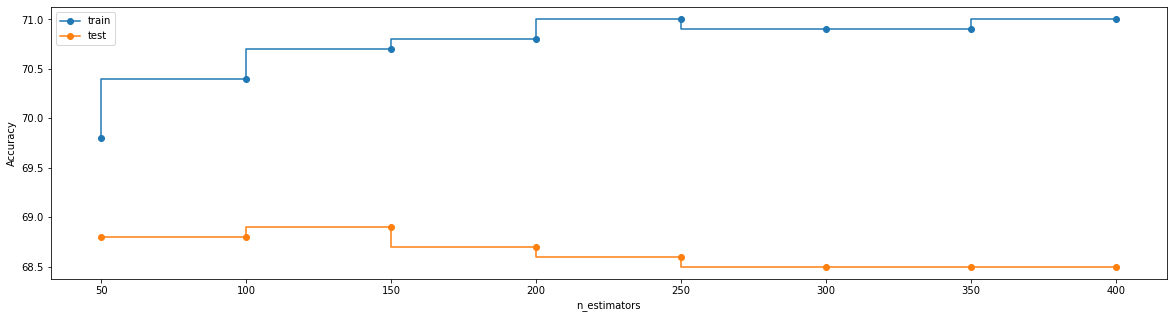

In [139]:
fig, ax = plt.subplots(figsize=(20,5))
ax.set_xlabel("n_estimators")
ax.set_ylabel("Accuracy")
ax.plot(n_estimators, train_scores, marker="o", label="train", drawstyle="steps")
ax.plot(n_estimators, test_scores, marker="o", label="test", drawstyle="steps")
ax.legend()
plt.show()

In [140]:
model0 = AdaBoostClassifier(learning_rate=0.25, 
                            random_state=state).fit(X_train, y_train)
print('train:',accuracy(X_train, y_train, model0))
print('test:',accuracy(X_test, y_test, model0))

train: 69.8
test: 68.8


###### Gradient Boosting

In [141]:
model5 = GradientBoostingClassifier(random_state=state).fit(X_train, y_train)
print('train:',accuracy(X_train, y_train, model5))
print('test:',accuracy(X_test, y_test, model5))

train: 74.2
test: 70.3


###### Extreme Gradient Boosting

In [142]:
model6 = xgb.XGBClassifier().fit(X_train, y_train)
print('train:',accuracy(X_train, y_train, model6))
print('test:',accuracy(X_test, y_test, model6))

train: 88.6
test: 67.4


In [143]:
model6 = xgb.XGBClassifier(learning_rate=0.025, 
                           n_estimators=50, 
                           subsample=0.125, 
                           reg_lambda=10).fit(X_train, y_train)
print('train:',accuracy(X_train, y_train, model6))
print('test:',accuracy(X_test, y_test, model6))

train: 72.5
test: 70.1


In [144]:
models = {'AdaBoost':model0, 
          'Logistic Regression':model1, 
          'K-Nearest Neighbors':model2, 
          'Decision Tree':model3, 
          'Random Forest':model4, 
          'Gradient Boosting':model5, 
          'Extreme Gradient Boosting':model6}
data = []
for key, value in models.items():
    arr = [key, accuracy(X_train, y_train, value), accuracy(X_test, y_test, value)]
    data.append(arr)
final = pd.DataFrame(data, columns=['model', 'train accuracy', 'test accuracy'])
final.style.set_properties(**{'border':'1px solid black'})

,model,train accuracy,test accuracy
0,AdaBoost,69.800000,68.800000
1,Logistic Regression,65.800000,62.500000
2,K-Nearest Neighbors,73.100000,55.100000
3,Decision Tree,70.800000,68.500000
4,Random Forest,72.200000,69.500000
5,Gradient Boosting,74.200000,70.300000
6,Extreme Gradient Boosting,72.500000,70.100000


In [145]:
pivot = pd.pivot_table(final, index=['model'])
pivot = np.round(pivot, 2)
pivot['model fit'] = pivot['train accuracy'] - pivot['test accuracy']

In [146]:
# blue shows maximum value in column
# green shows maximum value in column
pivot.style.highlight_max(color='lightblue').highlight_min(color='lightgreen').set_properties(**{
    'border':'1px solid black'})

,test accuracy,train accuracy,model fit
model,,,
AdaBoost,68.800000,69.800000,1.000000
Decision Tree,68.500000,70.800000,2.300000
Extreme Gradient Boosting,70.100000,72.500000,2.400000
Gradient Boosting,70.300000,74.200000,3.900000
K-Nearest Neighbors,55.100000,73.100000,18.000000
Logistic Regression,62.500000,65.800000,3.300000
Random Forest,69.500000,72.200000,2.700000
